In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import pandas as pd

# 깃허브에 준비된 데이터를 가져옵니다.
!git clone https://github.com/taehojo/data.git

# 와인 데이터를 불러옵니다.
df = pd.read_csv('./data/wine.csv', header=None)

# 데이터를 미리 보겠습니다.
df

Cloning into 'data'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 21 (delta 3), reused 20 (delta 2), pack-reused 0
Receiving objects: 100% (21/21), 460.95 KiB | 12.46 MiB/s, done.
Resolving deltas: 100% (3/3), done.


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [2]:
# 와인의 속성을 X로 와인의 분류를 y로 저장합니다.
X = df.iloc[:,0:12]
y = df.iloc[:,12]

In [3]:
# 학습셋과 테스트셋으로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

# 모델 구조를 설정합니다.
model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

# 모델을 컴파일합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델을 실행합니다.
history=model.fit(X_train, y_train, epochs=50, batch_size=500, validation_split=0.25) # 0.8 x 0.25 = 0.2

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                390       
                                                                 
 dense_1 (Dense)             (None, 12)                372       
                                                                 
 dense_2 (Dense)             (None, 8)                 104       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 875 (3.42 KB)
Trainable params: 875 (3.42 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
8/8 [==============================] - 2s 36ms/step - loss: 20.6106 - accuracy: 0.2510 - val_loss: 15.1978 - val_accuracy: 0.2338
Epoch 2/50
8/8 [=

In [4]:
# 테스트 결과를 출력합니다.
score=model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

41/41 [==============================] - 0s 1ms/step - loss: 0.1387 - accuracy: 0.9562
Test accuracy: 0.9561538696289062


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 깃허브에 준비된 데이터를 가져옵니다. 앞에서 이미 데이터를 가져왔으므로 주석 처리합니다. 2번 예제만 별도 실행 시 주석을 해제한 후 실행해주세요.
# !git clone https://github.com/taehojo/data.git

# 와인 데이터를 불러옵니다.
df = pd.read_csv('./data/wine.csv', header=None)

# 와인의 속성을 X로 와인의 분류를 y로 저장합니다.
X = df.iloc[:,0:12]
y = df.iloc[:,12]

# 학습셋과 테스트셋으로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

# 모델 구조를 설정합니다.
model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

# 모델을 컴파일합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 30)                390       
                                                                 
 dense_5 (Dense)             (None, 12)                372       
                                                                 
 dense_6 (Dense)             (None, 8)                 104       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 875 (3.42 KB)
Trainable params: 875 (3.42 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
# 모델 저장의 조건을 설정합니다.
modelpath="./data/model/all/{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, verbose=1)

# 모델을 실행합니다.
history=model.fit(X_train, y_train, epochs=500, batch_size=500, validation_split=0.25, verbose=0, callbacks=[checkpointer])


Epoch 1: saving model to ./data/model/all/01-0.9800.hdf5

Epoch 2: saving model to ./data/model/all/02-0.9808.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 3: saving model to ./data/model/all/03-0.9792.hdf5

Epoch 4: saving model to ./data/model/all/04-0.9800.hdf5

Epoch 5: saving model to ./data/model/all/05-0.9785.hdf5

Epoch 6: saving model to ./data/model/all/06-0.9808.hdf5

Epoch 7: saving model to ./data/model/all/07-0.9785.hdf5

Epoch 8: saving model to ./data/model/all/08-0.9792.hdf5

Epoch 9: saving model to ./data/model/all/09-0.9792.hdf5

Epoch 10: saving model to ./data/model/all/10-0.9792.hdf5

Epoch 11: saving model to ./data/model/all/11-0.9785.hdf5

Epoch 12: saving model to ./data/model/all/12-0.9815.hdf5

Epoch 13: saving model to ./data/model/all/13-0.9792.hdf5

Epoch 14: saving model to ./data/model/all/14-0.9815.hdf5

Epoch 15: saving model to ./data/model/all/15-0.9800.hdf5

Epoch 16: saving model to ./data/model/all/16-0.9808.hdf5

Epoch 17: saving model to ./data/model/all/17-0.9792.hdf5

Epoch 18: saving model to ./data/model/all/18-0.9800.hdf5

Epoch 19: saving model to ./data/model/all/19-0.9808.hdf5

Epo

In [7]:
# 테스트 결과를 출력합니다.
score=model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

41/41 [==============================] - 0s 1ms/step - loss: 0.1355 - accuracy: 0.9462
Test accuracy: 0.9461538195610046


In [13]:
# 그래프 확인을 위한 긴 학습
history=model.fit(X_train, y_train, epochs=500, batch_size=500, validation_split=0.25)

Epoch 1/500
8/8 [==============================] - 0s 30ms/step - loss: 0.0395 - accuracy: 0.9882 - val_loss: 0.0576 - val_accuracy: 0.9823
Epoch 2/500
8/8 [==============================] - 0s 20ms/step - loss: 0.0405 - accuracy: 0.9882 - val_loss: 0.0617 - val_accuracy: 0.9808
Epoch 3/500
8/8 [==============================] - 0s 21ms/step - loss: 0.0440 - accuracy: 0.9877 - val_loss: 0.0608 - val_accuracy: 0.9838
Epoch 4/500
8/8 [==============================] - 0s 18ms/step - loss: 0.0438 - accuracy: 0.9877 - val_loss: 0.0686 - val_accuracy: 0.9823
Epoch 5/500
8/8 [==============================] - 0s 29ms/step - loss: 0.0419 - accuracy: 0.9867 - val_loss: 0.0649 - val_accuracy: 0.9831
Epoch 6/500
8/8 [==============================] - 0s 19ms/step - loss: 0.0383 - accuracy: 0.9882 - val_loss: 0.0603 - val_accuracy: 0.9831
Epoch 7/500
8/8 [==============================] - 0s 11ms/step - loss: 0.0393 - accuracy: 0.9892 - val_loss: 0.0587 - val_accuracy: 0.9846
Epoch 8/500
8/8 [===

In [14]:
# history에 저장된 학습 결과를 확인해 보겠습니다.
hist_df=pd.DataFrame(history.history)
hist_df

,loss,accuracy,val_loss,val_accuracy
0,0.039486,0.988196,0.057622,0.982308
1,0.040482,0.988196,0.061701,0.980769
2,0.043978,0.987683,0.060785,0.983846
3,0.043789,0.987683,0.068634,0.982308
4,0.041860,0.986656,0.064860,0.983077
...,...,...,...,...
495,0.036567,0.989736,0.064960,0.984615
496,0.032616,0.991275,0.065794,0.983077
497,0.036790,0.988453,0.072908,0.983077
498,0.041915,0.987426,0.069084,0.986923


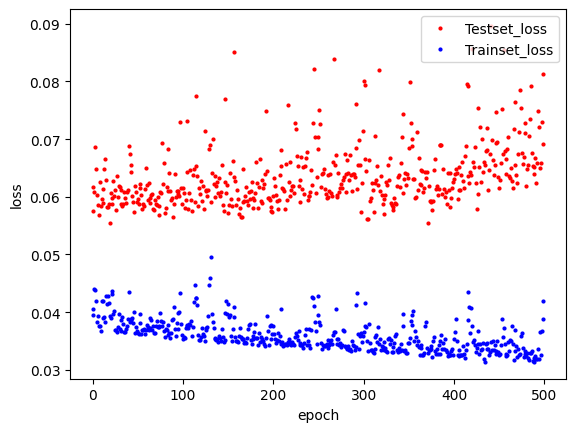

In [15]:
# y_vloss에 테스트셋의 오차를 저장합니다.
y_vloss=hist_df['val_loss']

# y_loss에 학습셋의 오차를 저장합니다.
y_loss=hist_df['loss']

# x 값을 지정하고 정확도를 파란색으로, 오차를 빨간색으로 표시합니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, "o", c="red", markersize=2, label='Testset_loss')
plt.plot(x_len, y_loss, "o", c="blue", markersize=2, label='Trainset_loss')

plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()